# Quand l'intélligence artificielle: le natural language processing se mêle des problèmes du Cameroun?

aaah, **Cameroun**, **berceau de nos ancêtres**, toi qui voit tes enfants s'entretuer, s'entredéchirer, faire la promotion de la haine, du tribalisme, de la jalousie, de la guerre et le vivre ensemble n'est qu'un ombre de lui-même.

Les Machines (IA) diront que tu n'as pas éduquer tes enfants alors que tu leurs as donné un cadeau précieux qui est l'hymne national du Cameroun version anglaise et française. Face aux différents problèmes (citez-ci haut) que le Cameroun est entrain de subir, ***est-ce-que l'hymne national version anglaise et française remets-t-il en cause notre éducation?***

L'objectif de ce cahier de note est de **`rechercher les messages`** qui se câchent dans notre hymne national version anglaise et française.
Pour ce faire, nous parlerons de:

1. `Définition des termes` 

2. `La statistique du texte`

3. `Partie du discours`

4. `Prétraitement de texte`

5. `Nuage des mots-clés`

6. `Fréquence des mots`

7. `Collocations`

8. `Modèle thématique`

9. `Conclusion`


# When artificial intelligence: natural language processing interferes with Cameroon's problems?

aaah, **Cameroon**, **cradle of our fathers**, you who see your children kill each other, tear each other apart, promote hatred, tribalism, jealousy, war and live it together is only a shadow of itself.

The Machines (AI) will say that you did not educate your children when you gave them a precious gift which is the national anthem of Cameroon, English and French version.
Faced with the various problems (quote above) that Cameroon is undergoing, ***does the national anthem in English and French version question our education?***

The objective of this notebook is to **`seek out the lessons`** that are hidden in our national anthem English and French version.
To do this, we will talk about:

1. `Definition of terms`

2. `Text statistics`

3. `Part of speech`

4. `Text preprocessing`

5. `Keyword cloud`

6. `Word frequency`

7. `Collocations`

6. `Topic modelling`

6. `Conclusion`

# Définition des termes

- **`L'intelligence artificielle (IA)`** est l'ensemble des théories et des techniques mises en œuvre en vue de réaliser des machines capables de simuler l'intelligence.

- **`Le traitement naturel du langage`** est une technologie permettant aux machines de comprendre le langage humain grâce à l'intelligence artificielle.

- **`Une partie du discours`** est une catégorie à laquelle un mot est attribué conformément à ses fonctions syntaxiques.

- **`Prétraitement de texte`** est une approche pour nettoyer et préparer les données textuelles à utiliser dans un contexte spécifique.

- **`Le nuage de mots-clés`**, ou **`nuage de tags`** est une représentation visuelle des mots-clés (tags) les plus utilisés sur un site web, texte, document, discours, etc.

- **`La fréquence des mots`** est la fréquence à laquelle un mot apparaît dans un texte ou un corpus donné.

- **`La collocation`** aide à identifier les mots qui coexistent couramment. (digramme, trigramme)

- **`Un modèle thématique`** est un type de modèle ou de modélisation statistique permettant de découvrir les «sujets» abstraits qui apparaissent dans une collection de documents ou de texte.


#  Definition of terms

- **`Artificial intelligence (AI)`** is the set of theories and techniques implemented to create machines capable of simulating intelligence.

- **`Natural language processing`** or **`NLP`** is a technology that enables machines to understand human language using artificial intelligence.

- **`Part of Speech`** is a category to which a word is assigned according to its syntactic functions.

- **`Text preprocessing`** is an approach to clean up and prepare text data for use in a specific context.

- **`The keyword cloud`** or **`tag cloud`** is a visual representation of the most used keyword (tags) on a website, text, document, speech, etc...

- **`Word frequency`** is the frequency at which a word appears a given text or corpus.

- **`Collocation`** helps identify words that commonly coexist (bigrams, trograms).

- **`Topic modelling`** is a type of model or statistical modelling allowing to discover the abstract "subjects" which appear in a collection of documents or of text. 

# Procedure

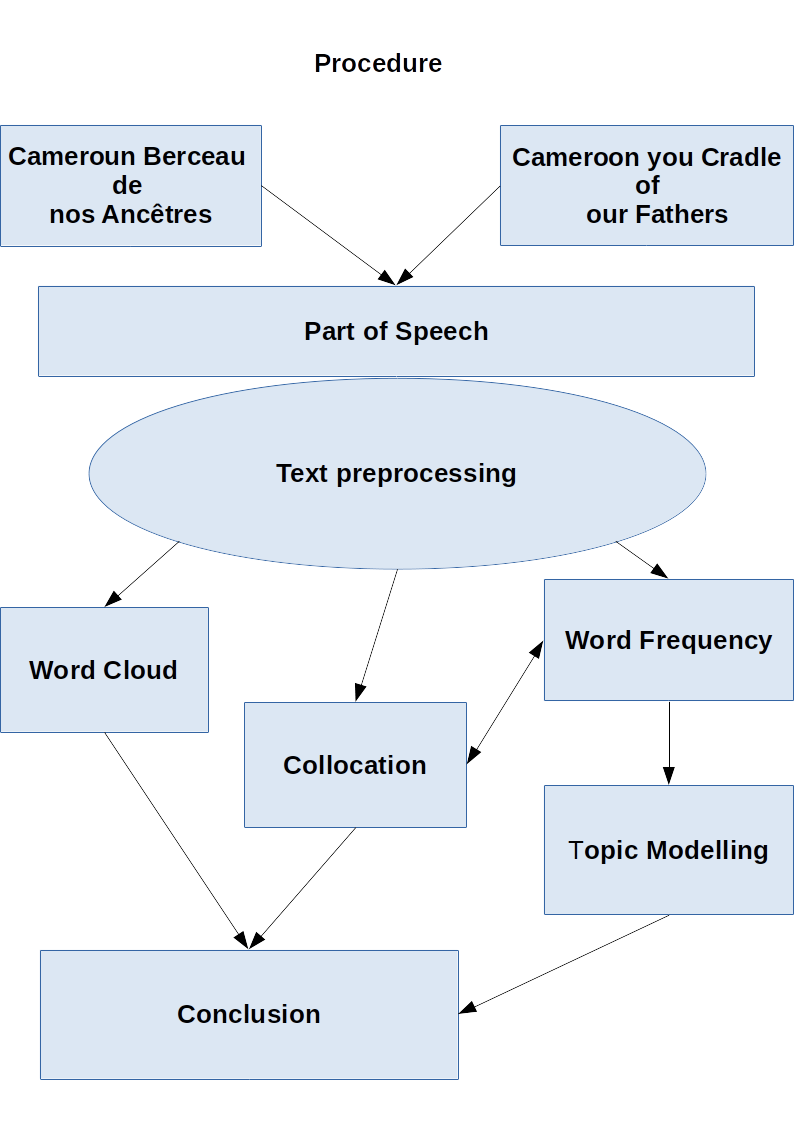

In [1]:
import nltk
from collections import Counter
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
import gensim
import string
from gensim import corpora
from gensim.corpora.dictionary import Dictionary
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import spacy
from spacy import displacy
from pprint import pprint 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from statsmodels.graphics.mosaicplot import mosaic
from imageio import imread

In [2]:
sns.set(style='whitegrid')
pd.set_option('display.max_colwidth', 300)
pd.set_option('display.max_rows', 10000)

In [3]:
def tokenizer(text, english=True):
    
    def is_token_allowed(token):
        if(not token or token.is_stop or token.is_punct or not token.is_alpha):
            return False
        return True
    
    def preprocess_token(token):
        return token.lemma_.strip().lower()
    
    if english:
        nlp = spacy.load("en_core_web_sm")
    else:
        nlp = spacy.load('fr_core_news_sm')
    
    doc = nlp(text)
    
    filtered_token = [preprocess_token(token) for token in doc if is_token_allowed(token)]
    
    return filtered_token  

# I. Statistique du texte (Text statistic)

In [4]:
text_fr = open('../data/hymne_national_Cameroun.txt').read() # french version
text_en = open('../data/the cameroon national anthem').read() # english version

## I.1. Hymne national version française

In [5]:
print(text_fr)

Cameroun Berceau de nos ancêtres

Ô cameroun berceau de nos ancêtres, 
Va debout, et jaloux de ta liberté.
Comme un soleil ton drapeau fier doit être
Un symbole ardent de foi et d'unité.
Que tous tes enfants du Nord au Sud,
De l'Est à l'Ouest soient tout amour !
Te servir que ce soit leur seul but 
Pour remplir leur devoir toujours !

Chère Patrie, terre chérie,
Tu es notre seul et vrai bonheur.
Notre joie et notre vie,
A toi l'amour et le grand honneur !

Tu es la tombe où dorment nos pères.
Le jardin que nos aïeux ont cultivé.
Nous travaillons pour te rendre prospère,
Un beau jour enfin nous serons arrivée.
De l'Afrique sois fidèle enfant !
Et progresse toujours en paix .
Espèrant que tes jeunes enfants
T'aimeront sans bornes à jamais.

Chère Patrie, terre chérie,
Tu es notre seul et vrai bonheur.
Notre joie et notre vie,
A toi l'amour et le grand honneur !



### I.1.1 Distribution

In [6]:
print(f'Longueur du texte: {len(text_fr)} mots, caractères et ponctuations.')
print(f'Lenght of the text: {len(text_fr)} words, character and punctuation.')

Longueur du texte: 872 mots, caractères et ponctuations.
Lenght of the text: 872 words, character and punctuation.


In [7]:
split_word = text_fr.split(' ')
val = len(text_fr)/len(set(np.unique(split_word)))
print(f"Ressource lexicale du texte: {round(val, 2)}. Ce nombre indique le nombre de fois q'un mot,\
un caractère, une ponctuation apparaît dans le texte.")
print(f'Lexical richness of the text: {round(val, 2)}. This number indicates occurences of word,\
character and punctuation in the text.')

Ressource lexicale du texte: 8.63. Ce nombre indique le nombre de fois q'un mot,un caractère, une ponctuation apparaît dans le texte.
Lexical richness of the text: 8.63. This number indicates occurences of word,character and punctuation in the text.


In [8]:
fdist_fr = nltk.FreqDist(tokenizer(text_fr, english=False))

In [9]:
pop_word_fr = list(set(fdist_fr.keys()) - set(fdist_fr.hapaxes()))

In [10]:
pop_word_fr = pd.Series({w:fdist_fr[w] for w in sorted(pop_word_fr)})

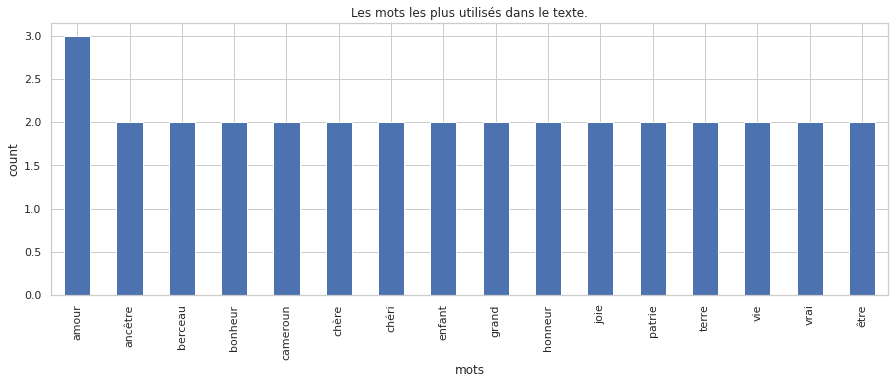

In [11]:
pop_word_fr.plot(kind='bar', title='Les mots les plus utilisés dans le texte.', figsize=(15,5))
plt.ylabel('count')
plt.xlabel('mots')
plt.show()

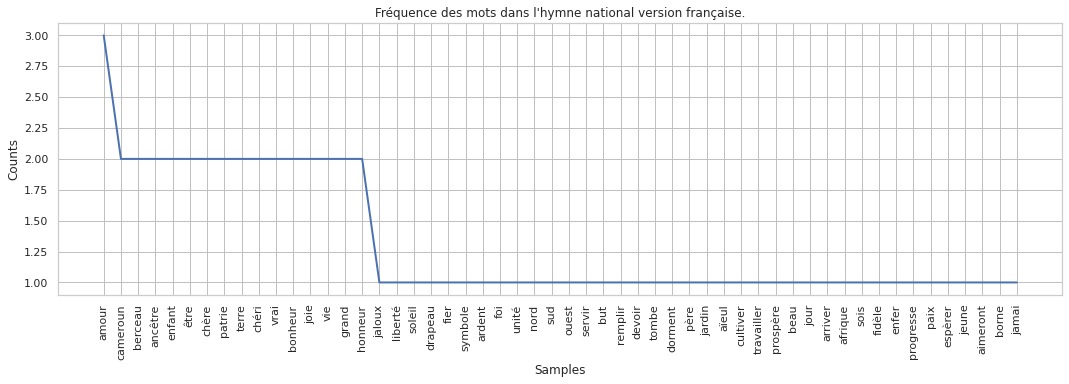

In [12]:
plt.figure(figsize=(18,5))
fdist_fr.plot(title="Fréquence des mots dans l'hymne national version française.")
plt.show()

**`amour`** apparaît 3 fois.

## I.2. National anthem english version

In [13]:
print(text_en)

Cameroon you cradle of our Fathers

O Cameroon, you cradle of our Fathers. 
Holy Shrine where in our midst they now repose.
Their tears and blood and sweat your soil did water,
On your hills and valleys once their tillage rose.
Dear Fatherland, your worth no tongue can tell!
How can we ever pay your due?
Your welfare we will win in toil and love and peace,
Will be to your name ever true!

Land of Promise, land of Glory!
you, of life and joy, our only store!
Yours be honour, yours devotion,
And deep endearment, for evermore.

From Shari, from where the Mungo meanders
From along the banks of lowly Boumba Stream.
Muster your sons in union close around you.
Mighty as the Buea Mountain be their team;
Instill in them the love of gentle ways,
Regret for errors of the past;
Foster, for Mother Africa, a loyalty
That true shall remain to the last.

Land of Promise, land of Glory!
you, of life and joy, our only store!
Yours be honour, yours devotion,
And deep endearment, for evermore.






### I.2.1. Distribution

In [14]:
print(f'Longueur du texte: {len(text_en)} mots, caractères et ponctuations.')
print(f'Lenght of the text: {len(text_en)} words, characters and punctuations.')

Longueur du texte: 992 mots, caractères et ponctuations.
Lenght of the text: 992 words, characters and punctuations.


In [15]:
split_worde = text_en.split(' ')
val = len(text_en)/len(set(np.unique(split_worde)))
print(f"Ressource lexicale du texte: {round(val, 2)}. Ce nombre indique le nombre de fois q'un mot,\
un caractère, une ponctuation apparaît dans le texte.")
print(f'Lexical richness of the text: {round(val, 2)}. This number indicates occurences of a word,\
a character and a punctuation in the text.')

Ressource lexicale du texte: 10.23. Ce nombre indique le nombre de fois q'un mot,un caractère, une ponctuation apparaît dans le texte.
Lexical richness of the text: 10.23. This number indicates occurences of a word,a character and a punctuation in the text.


In [16]:
fdist_en = nltk.FreqDist(tokenizer(text_en))

In [17]:
pop_word_en = list(set(fdist_en.keys()) - set(fdist_en.hapaxes()))

In [18]:
pop_word_en = pd.Series({w:fdist_en[w] for w in sorted(pop_word_en)})

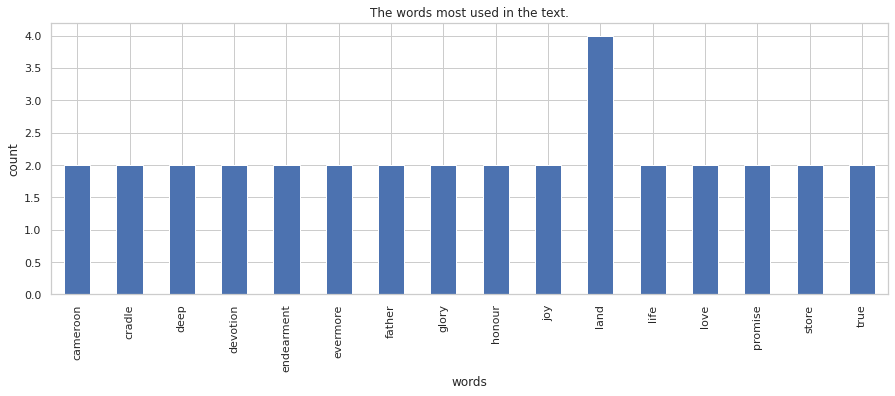

In [19]:
pop_word_en.plot(kind='bar', title='The words most used in the text.', figsize=(15,5))
plt.ylabel('count')
plt.xlabel('words')
plt.show()

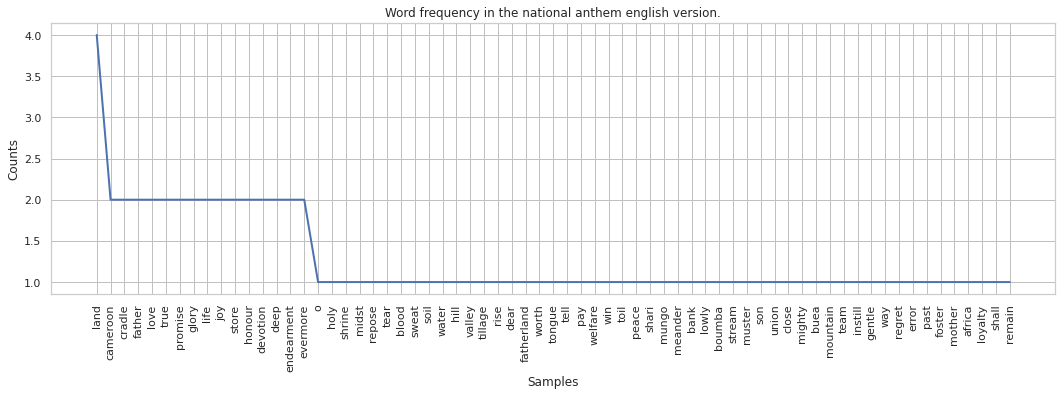

In [20]:
plt.figure(figsize=(18,5))
fdist_en.plot(title="Word frequency in the national anthem english version.")
plt.show()

**`land`** comes 4 times in the text.

In [21]:
nlp_en = spacy.load('en_core_web_sm')# english language package
nlp_fr = spacy.load('fr_core_news_sm') # french language package

In [22]:
#processing 
doc_fr = nlp_fr(text_fr) 
doc_en = nlp_en(text_en)

# II. Part of speech (Partie du discours)

<div class="alert alert-info">
    <p>is a class of words based on the word's function, the way it works in a sentence. The part of speech are noun, verb, adjective, adverb, pronoun, preposition, conjunction, and interjection.</p>
    <p> est une classe de mots basée sur la fonction du mot, la façon dont il fonctionne dans une phrase. Les parties du discours sont le nom, le verbe, l'adjectif, l'adverbe, le pronom, la préposition, la conjonction et l'interjection.</p>
</div>


## II.1. National anthem english version

In [23]:
part_of_speech = pd.DataFrame()

In [24]:
part_of_speech['text'] = [token.text for token in doc_en if not token.is_stop and not token.is_punct and token.is_alpha]
part_of_speech['lemma'] = [token.lemma_ for token in doc_en if not token.is_stop and not token.is_punct and token.is_alpha]
part_of_speech['pos'] = [token.pos_ for token in doc_en if not token.is_stop and not token.is_punct and token.is_alpha] 
part_of_speech['dep'] = [token.dep_ for token in doc_en if not token.is_stop and not token.is_punct and token.is_alpha]
part_of_speech['tag'] = [token.tag_ for token in doc_en if not token.is_stop and not token.is_punct and token.is_alpha]
part_of_speech['shape'] = [token.shape_ for token in doc_en if not token.is_stop and not token.is_punct and token.is_alpha]
part_of_speech['alpha'] = [token.is_alpha for token in doc_en if not token.is_stop and not token.is_punct and token.is_alpha]
part_of_speech['stopword'] = [token.is_stop for token in doc_en if not token.is_stop and not token.is_punct and token.is_alpha]
part_of_speech['explain'] = [spacy.explain(token.tag_) for token in doc_en if not token.is_stop and not token.is_punct and token.is_alpha]

In [25]:
part_of_speech

,text,lemma,pos,dep,tag,shape,alpha,stopword,explain
0,Cameroon,cameroon,VERB,dep,VB,Xxxxx,True,False,"verb, base form"
1,cradle,cradle,NOUN,dobj,NN,xxxx,True,False,"noun, singular or mass"
2,Fathers,father,NOUN,pobj,NNS,Xxxxx,True,False,"noun, plural"
3,O,o,INTJ,intj,UH,X,True,False,interjection
4,Cameroon,Cameroon,PROPN,npadvmod,NNP,Xxxxx,True,False,"noun, proper singular"
5,cradle,cradle,VERB,ROOT,VBP,xxxx,True,False,"verb, non-3rd person singular present"
6,Fathers,father,NOUN,pobj,NNS,Xxxxx,True,False,"noun, plural"
7,Holy,Holy,PROPN,compound,NNP,Xxxx,True,False,"noun, proper singular"
8,Shrine,Shrine,PROPN,ROOT,NNP,Xxxxx,True,False,"noun, proper singular"
9,midst,midst,NOUN,pobj,NN,xxxx,True,False,"noun, singular or mass"


<div class="alert alert-info">
    <p> Text: The original word text.</p>
    <p> Lemma: The base form of the word.</p>
    <p> POS: The simple UPOS part-of-speech tag.</p>
    <p> Tag: The detailed part-of-speech tag.</p>
    <p> Dep: Syntactic dependency, i.e. the relation between tokens.</p>
    <p> Shape: The word shape – capitalization, punctuation, digits.</p>
    <p> is alpha: Is the token an alpha character?</p>
    <p> is stop: Is the token part of a stop list, i.e. the most common words of the language?</p>
</div>

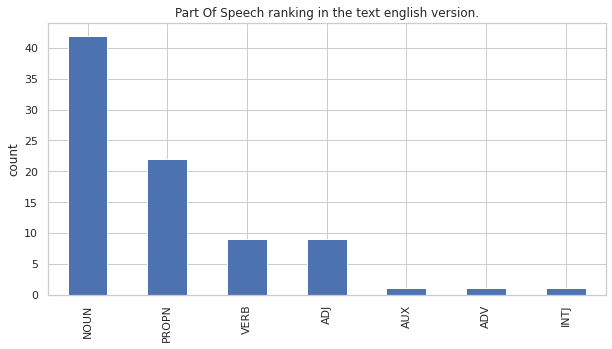

In [26]:
part_of_speech.pos.value_counts().plot(figsize=(10,5), kind='bar')
plt.ylabel('count')
plt.title('Part Of Speech ranking in the text english version.')
plt.show()

## II.2/ Hymne national version français

In [27]:
pos = pd.DataFrame()

In [28]:
pos['text'] = [token.text for token in doc_fr if not token.is_stop and not token.is_punct and token.is_alpha]
pos['lemma'] = [token.lemma_ for token in doc_fr if not token.is_stop and not token.is_punct and token.is_alpha]
pos['pos'] = [token.pos_ for token in doc_fr if not token.is_stop and not token.is_punct and token.is_alpha] 
pos['dep'] = [token.dep_ for token in doc_fr if not token.is_stop and not token.is_punct and token.is_alpha]
pos['tag'] = [token.tag_ for token in doc_fr if not token.is_stop and not token.is_punct and token.is_alpha]
pos['shape'] = [token.shape_ for token in doc_fr if not token.is_stop and not token.is_punct and token.is_alpha]
pos['alpha'] = [token.is_alpha for token in doc_fr if not token.is_stop and not token.is_punct and token.is_alpha]
pos['stopword'] = [token.is_stop for token in doc_fr if not token.is_stop and not token.is_punct and token.is_alpha]
pos['explain'] = [spacy.explain(token.tag_) for token in doc_fr if not token.is_stop and not token.is_punct and token.is_alpha]

In [29]:
pos

,text,lemma,pos,dep,tag,shape,alpha,stopword,explain
0,Cameroun,Cameroun,PROPN,nsubj,PROPN,Xxxxx,True,False,proper noun
1,Berceau,Berceau,PROPN,flat:name,PROPN,Xxxxx,True,False,proper noun
2,ancêtres,ancêtre,NOUN,nmod,NOUN,xxxx,True,False,noun
3,cameroun,cameroun,VERB,ROOT,VERB,xxxx,True,False,verb
4,berceau,berceau,ADJ,advmod,ADJ,xxxx,True,False,adjective
5,ancêtres,ancêtre,NOUN,nmod,NOUN,xxxx,True,False,noun
6,jaloux,jaloux,NOUN,conj,NOUN,xxxx,True,False,noun
7,liberté,liberté,NOUN,nmod,NOUN,xxxx,True,False,noun
8,soleil,soleil,NOUN,nmod,NOUN,xxxx,True,False,noun
9,drapeau,drapeau,NOUN,amod,NOUN,xxxx,True,False,noun


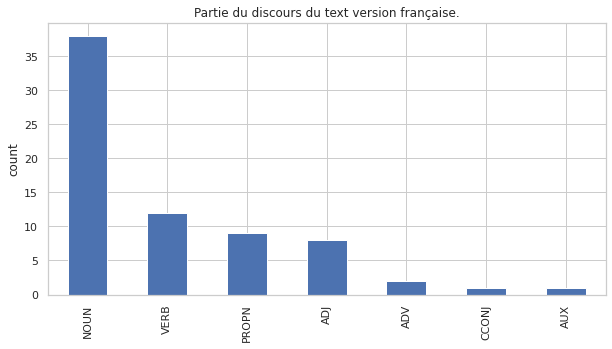

In [30]:
pos.pos.value_counts().plot(figsize=(10,5), kind='bar')
plt.ylabel('count')
plt.title('Partie du discours du text version française.')
plt.show()

# III./ Word Cloud (nuage des mots)
<div class="alert-info">
    <p> is a data visualization technique where words from a given text are displayed in a chart, with the more important words being written with bigger, bold fonts, while less important words are displayed with smaller, thinner fonts or not displayed at all.</p>
</div>

In [31]:
join_text_fr = " ".join( s for s in tokenizer(text_fr, english=False))
join_text_en = " ".join( u for u in tokenizer(text_en))

## III.1/ Word cloud english version

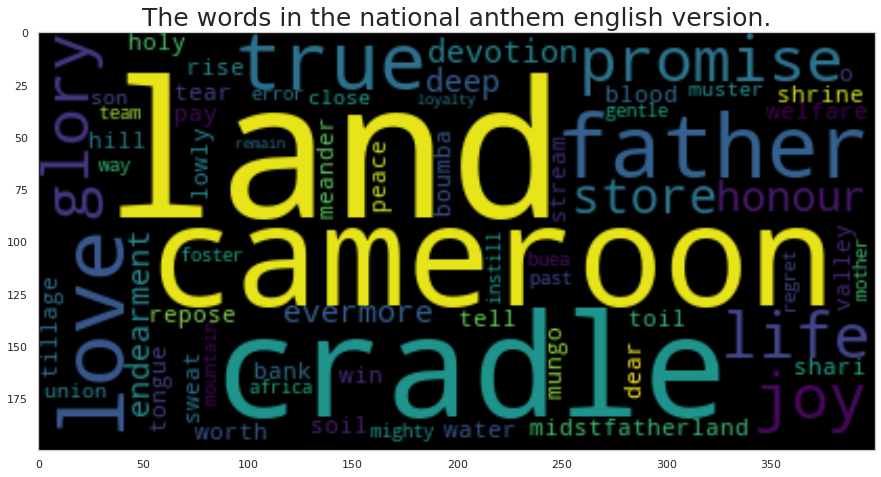

In [32]:
plt.figure(figsize = (15,15)) 
ws = WordCloud()
ws.generate(join_text_en) # Generating WordCloud
plt.imshow(ws , interpolation = 'bilinear')
plt.title("The words in the national anthem english version.", fontdict={'fontsize': 25})
plt.grid(False)
plt.show()

## III.2/ Hymne national version française

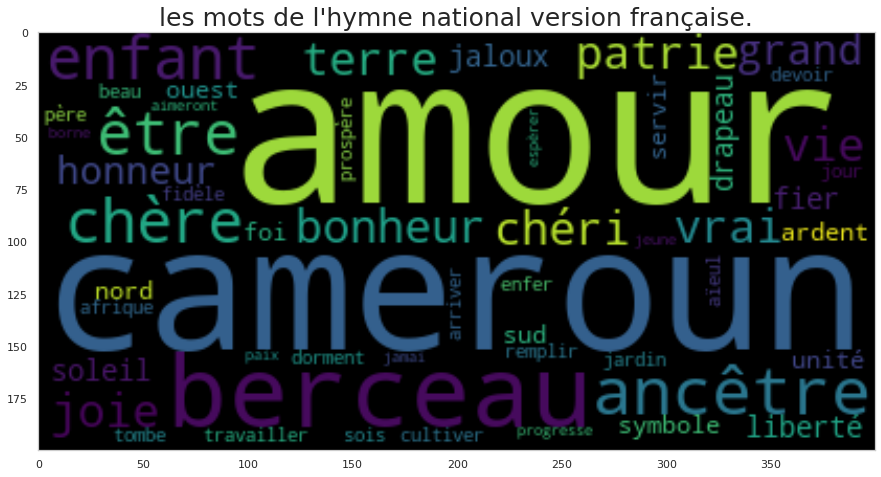

In [33]:
plt.figure(figsize = (15,15)) 
wc = WordCloud()
wc.generate(join_text_fr) # Generating WordCloud
plt.imshow(wc , interpolation = 'bilinear')
plt.title("les mots de l'hymne national version française.", fontdict={'fontsize': 25})
plt.grid(False)
plt.show()

# IV/ Collocation
<div class = "alert-info">
    <p> Nous cherchons les mots qui coexistent couramment: bigramme (deux mots coexistent) et trigramme (trois mots qui coexistent).</p>
</div>

In [34]:
fr_tokens = tokenizer(text_fr, english=False)
en_tokens = tokenizer(text_en)

In [35]:
bigrams_fr = list(nltk.trigrams(fr_tokens))
bigrams_en = list(nltk.trigrams(en_tokens))

In [36]:
cfd_t_fr = nltk.FreqDist(bigrams_fr)
cfd_t_en = nltk.FreqDist(bigrams_en)

In [37]:
cdic_fr={x[0][0] + ' ' + x[0][1]+' '+x[0][2]: x[1] for x in cfd_t_fr.most_common(n=30) if x[1]>1}
cdic_en={x[0][0] + ' ' + x[0][1]+' '+x[0][2]: x[1] for x in cfd_t_en.most_common(n=30) if x[1]>1}

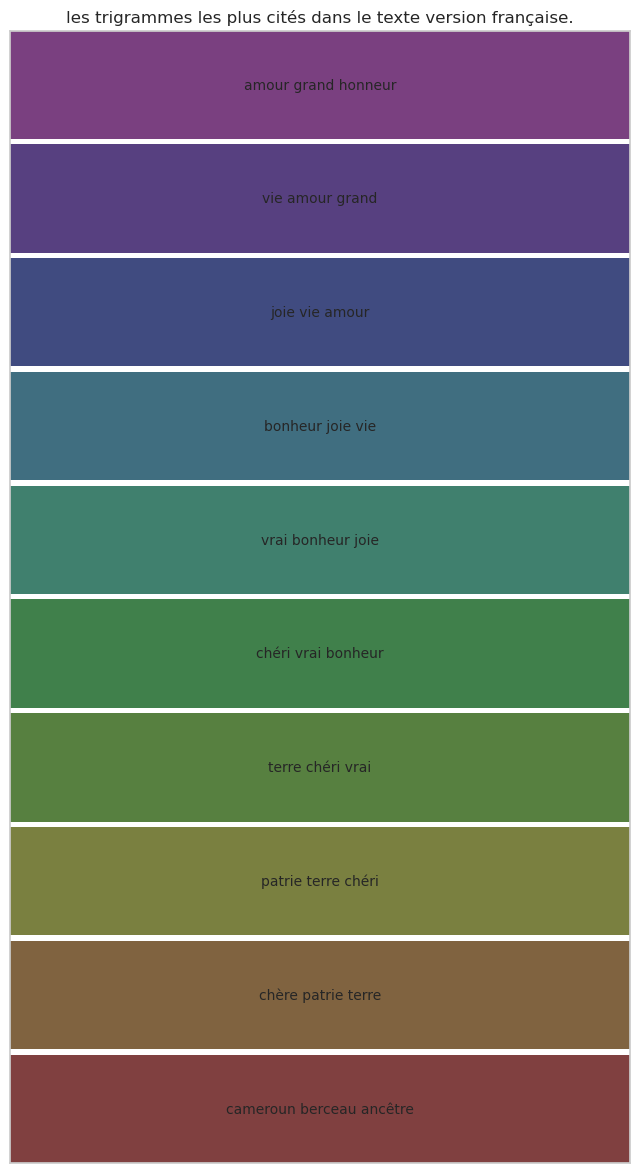

In [38]:
fig1, ax1 = plt.subplots(figsize=(8, 15), dpi=100)
mosaic(cdic_fr, ax=ax1,  axes_label=False,
       horizontal=False, title='les trigrammes les plus cités dans le texte version française.')
plt.show()

<div class='alert-info'>
    <p> Les trois mots qui coexistent ensemble et qui sont cité plus d'une fois. Ces trigrammes demontrent la puissance des 
    mots dans l'hymne national du cameroun version française. Nous devons chercher le vraie bonheur, chéri la terre patrie, chéri la vraie terre. </p>
    <p> The three words which coexist together and which are cited more than once. These trigrams demonstrate the power of
     words in the Cameroonian national anthem in French version. We must seek real happiness, darling the homeland, darling the real earth.</p>
</div>

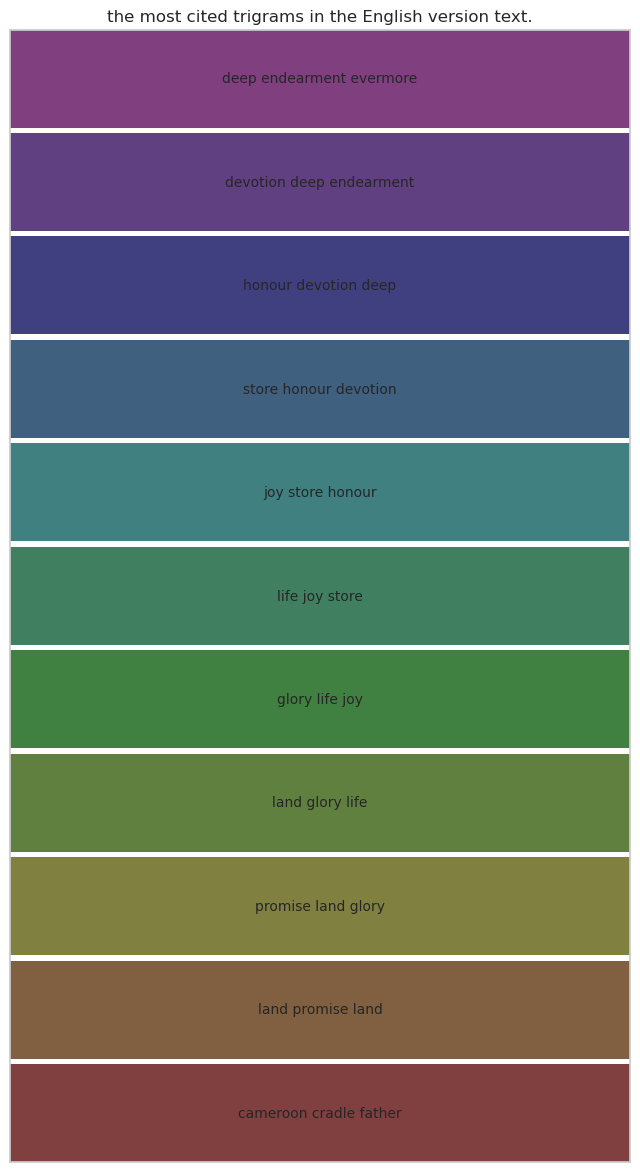

In [39]:
fig2, ax2 = plt.subplots(figsize=(8, 15), dpi=100)
mosaic(cdic_en, ax=ax2,  axes_label=False,
       horizontal=False, title='the most cited trigrams in the English version text.')
plt.show()

# V/ Topic Modelling (Modèle thématique)

<div class="alert-info">
    <p> Comme vous pouvez le voir, nous allons cherche le sujet qui existe dans les deux version de l'hymne national.</p>
    <p> Topic modelling is a process to define topic in the large text. A Topic model may be defined as the probabilistic model containing information about topics in our text.</p>
</div>

In [40]:
def topic_model(texts, num_topics):
    dict_text = Dictionary([[s] for s in texts])
    bow = dict_text.doc2bow(texts)
    # LDA Model for anthem french version
    lda_model = gensim.models.ldamodel.LdaModel(corpus=[bow], num_topics=num_topics, id2word= dict_text, 
                                               random_state=0, per_word_topics=True, chunksize=5)
    return lda_model, lda_model.get_document_topics(bow)

## V.1/ National anthem english version

In [41]:
tmodel_en, topic_en = topic_model(tokenizer(text_en), 5)

In [42]:
print('Topics: National anthem english version: \n')
pprint(tmodel_en.print_topics())

Topics: National anthem english version: 

[(0,
  '0.034*"land" + 0.023*"cameroon" + 0.023*"father" + 0.020*"joy" + '
  '0.020*"promise" + 0.020*"cradle" + 0.020*"evermore" + 0.020*"endearment" + '
  '0.020*"glory" + 0.020*"deep"'),
 (1,
  '0.022*"land" + 0.018*"true" + 0.018*"promise" + 0.018*"father" + '
  '0.018*"joy" + 0.017*"cradle" + 0.017*"honour" + 0.017*"endearment" + '
  '0.016*"glory" + 0.016*"love"'),
 (2,
  '0.044*"land" + 0.025*"life" + 0.023*"cradle" + 0.021*"honour" + '
  '0.021*"store" + 0.021*"father" + 0.021*"deep" + 0.021*"devotion" + '
  '0.020*"love" + 0.020*"promise"'),
 (3,
  '0.027*"land" + 0.025*"love" + 0.024*"honour" + 0.023*"endearment" + '
  '0.023*"deep" + 0.023*"evermore" + 0.023*"devotion" + 0.022*"store" + '
  '0.022*"promise" + 0.022*"glory"'),
 (4,
  '0.028*"land" + 0.021*"cameroon" + 0.021*"true" + 0.021*"joy" + '
  '0.020*"glory" + 0.020*"devotion" + 0.020*"father" + 0.020*"life" + '
  '0.019*"store" + 0.019*"evermore"')]


<div class="alert-info">
    <p> We obtain five differents topics with topicid ={0,1,2,3,4} and  with words. Each words in each topics are order respect to the weights (probability).</p>
</div>

### Topic of Cameroonian national anthem for english version is

In [43]:
print(f'Topic {topic_en[0][0]} with the probability = {round(100*topic_en[0][1], 2)}%.')

Topic 2 with the probability = 99.06%.


In [44]:
#tmodel_en.get_topic_terms(2)

In [45]:
tword_en = part_of_speech[part_of_speech.lemma.isin(['land','life', 'cradle', 'honour', 'store','father',
                                          'deep','devotion','love','Promise'])]

In [46]:
tword_en[tword_en.duplicated(subset=['lemma']) == False]

,text,lemma,pos,dep,tag,shape,alpha,stopword,explain
1,cradle,cradle,NOUN,dobj,NN,xxxx,True,False,"noun, singular or mass"
2,Fathers,father,NOUN,pobj,NNS,Xxxxx,True,False,"noun, plural"
29,love,love,NOUN,conj,NN,xxxx,True,False,"noun, singular or mass"
33,Promise,Promise,PROPN,pobj,NNP,Xxxxx,True,False,"noun, proper singular"
34,land,land,NOUN,appos,NN,xxxx,True,False,"noun, singular or mass"
36,life,life,NOUN,pobj,NN,xxxx,True,False,"noun, singular or mass"
38,store,store,NOUN,appos,NN,xxxx,True,False,"noun, singular or mass"
39,honour,honour,ADJ,acomp,JJ,xxxx,True,False,adjective
40,devotion,devotion,NOUN,npadvmod,NN,xxxx,True,False,"noun, singular or mass"
41,deep,deep,ADJ,amod,JJ,xxxx,True,False,adjective


**Exercise**: *can you formulate  phrases with these words of the topic 2 according to the part of speech (pos) and dependency (dep) of these words?* 

# V.2/ Hymne National version française

In [47]:
tmodel_fr, topic_fr = topic_model(tokenizer(text_fr, english=False), 10)

In [48]:
print('Sujets: Hymne national du Cameroun version française: \n')
pprint(tmodel_fr.print_topics())

Sujets: Hymne national du Cameroun version française: 

[(0,
  '0.038*"amour" + 0.031*"ancêtre" + 0.029*"cameroun" + 0.027*"honneur" + '
  '0.027*"être" + 0.027*"berceau" + 0.025*"grand" + 0.024*"vie" + '
  '0.024*"terre" + 0.023*"bonheur"'),
 (1,
  '0.042*"amour" + 0.030*"vie" + 0.029*"enfant" + 0.029*"bonheur" + '
  '0.028*"berceau" + 0.027*"terre" + 0.027*"joie" + 0.026*"chère" + '
  '0.026*"chéri" + 0.026*"vrai"'),
 (2,
  '0.031*"ancêtre" + 0.030*"amour" + 0.029*"enfant" + 0.029*"être" + '
  '0.027*"joie" + 0.026*"bonheur" + 0.025*"cameroun" + 0.024*"vie" + '
  '0.024*"honneur" + 0.024*"berceau"'),
 (3,
  '0.019*"amour" + 0.019*"berceau" + 0.019*"joie" + 0.019*"honneur" + '
  '0.019*"bonheur" + 0.019*"vrai" + 0.019*"chère" + 0.019*"ancêtre" + '
  '0.019*"patrie" + 0.019*"chéri"'),
 (4,
  '0.033*"patrie" + 0.032*"amour" + 0.030*"chère" + 0.029*"terre" + '
  '0.028*"grand" + 0.028*"vrai" + 0.027*"honneur" + 0.026*"cameroun" + '
  '0.026*"chéri" + 0.025*"être"'),
 (5,
  '0.027*"patrie

<div class="alert-info">
    <p> Pour cette partie, nous avons 5 sujets numeroté de 0 à 4 et chaque sujet est constitué de 10 mots ayant chacun leur poids (probabilité). Cette probabilité montre à quel point un mot appartient à un sujet. </p>
</div>

### Le sujet de l'hymne national du cameroun version française est

In [49]:
print(f'Topic {topic_fr[0][0]} with the probability = {round(100*topic_fr[0][1], 2)}%.')

Topic 1 with the probability = 98.75%.


In [50]:
tword_fr = pos[pos.lemma.isin(["amour","vie", "enfant", "bonheur", "berceau", "terre",
                               "joie", "chère", "chéri", "vrai"])]

In [51]:
tword_fr[tword_fr.duplicated(subset=['lemma']) == False]

,text,lemma,pos,dep,tag,shape,alpha,stopword,explain
4,berceau,berceau,ADJ,advmod,ADJ,xxxx,True,False,adjective
15,enfants,enfant,NOUN,nsubj,NOUN,xxxx,True,False,noun
20,amour,amour,NOUN,ROOT,NOUN,xxxx,True,False,noun
25,Chère,chère,NOUN,ROOT,NOUN,Xxxxx,True,False,noun
27,terre,terre,NOUN,amod,NOUN,xxxx,True,False,noun
28,chérie,chéri,NOUN,ROOT,NOUN,xxxx,True,False,noun
29,vrai,vrai,ADJ,conj,ADJ,xxxx,True,False,adjective
30,bonheur,bonheur,NOUN,nmod,NOUN,xxxx,True,False,noun
31,joie,joie,NOUN,nmod,NOUN,xxxx,True,False,noun
32,vie,vie,NOUN,conj,NOUN,xxx,True,False,noun


# Summary (Recapitulatif)

We summarize our work.

Nous recapitulons notre travail.

In [52]:
img1 = '/home/massock/Documents/wutsi blog/I.A et Cameroon/frenchVer.png'
img2 = '/home/massock/Documents/wutsi blog/I.A et Cameroon/englishVer.png'

In [53]:
def summary(imagefile, text, keywords, label):
    words = " ".join(keywords)
    
    plt.figure(figsize=(15,5), dpi=200)
    plt.imshow(imread(imagefile))
    plt.grid(False)
    plt.axis('off')
    plt.title(label[0])
    plt.show()
    
    plt.figure(figsize=(15,5))
    wc = WordCloud()
    wc.generate(words) # Generating WordCloud
    plt.imshow(wc , interpolation = 'bilinear')
    plt.title(label[1], fontdict={'fontsize': 25})
    plt.grid(False)
    plt.axis('off')
    
    

In [54]:
key_en = ['land','life', 'cradle', 'honour', 'store','father',
                                          'deep','devotion','love','Promise']
key_fr = ["amour","vie", "enfant", "bonheur", "berceau", "terre",
                               "joie", "chère", "chéri", "vrai"]

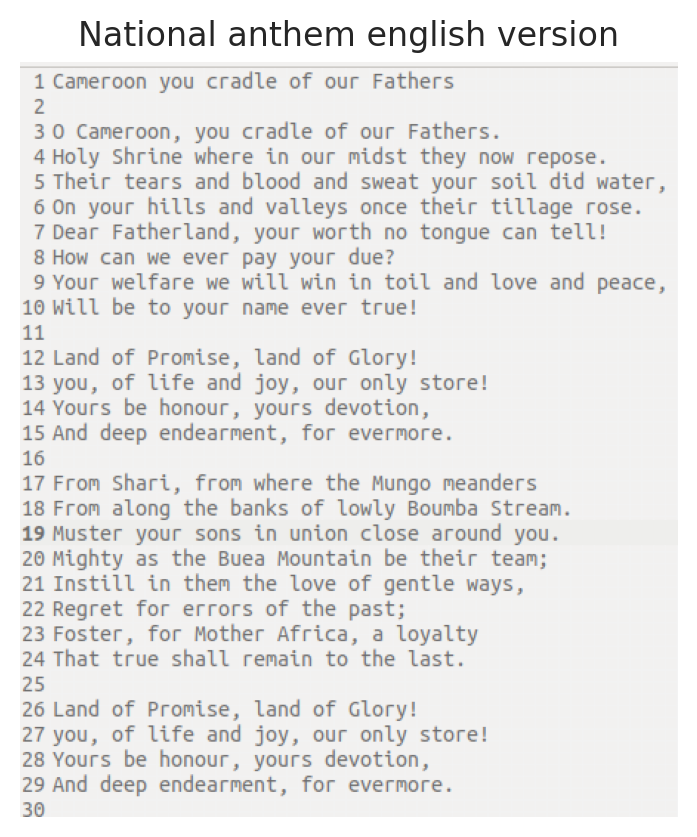

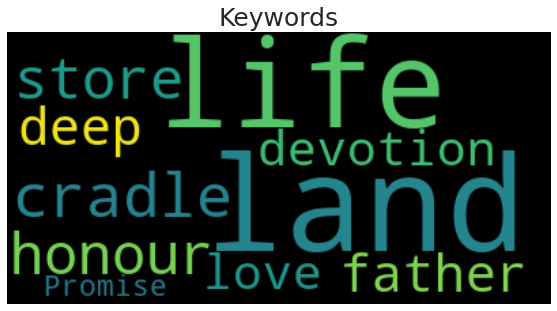

In [55]:
summary(img2, text_en, key_en, ["National anthem english version", "Keywords"])

We learn that:
1. **The Cradle of our Father is the Land of Promise that we must evermore love with deep endearment and devotion.**
2. **The Cradle of our Father is the land of love, joy, true, honour and life.**

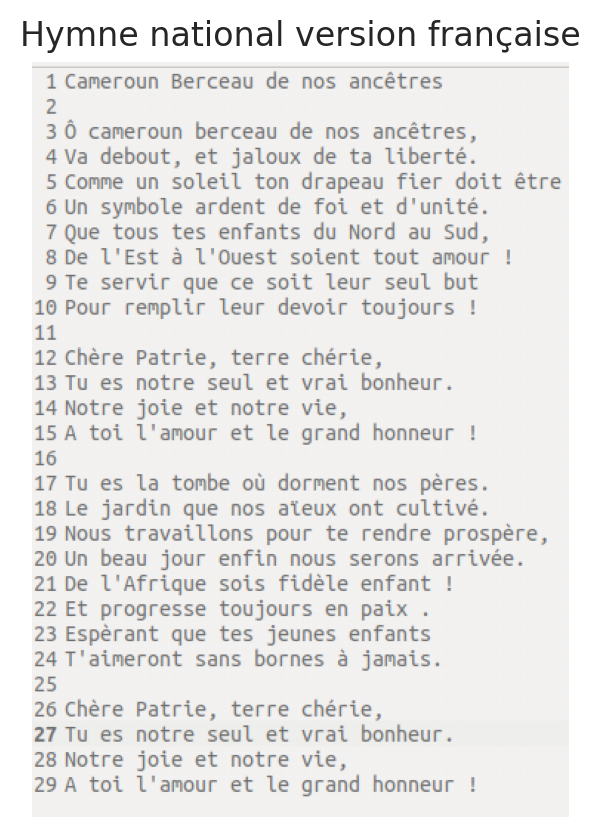

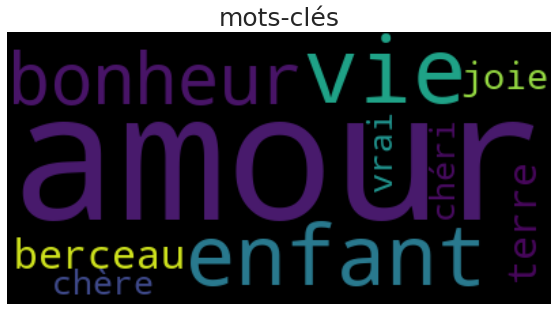

In [56]:
summary(img1, text_fr, key_fr, ["Hymne national version française", "mots-clés"])

le message à tirer est le suivant:
1. **chère enfant soit amour**
2. **la terre chéri qui est le berceau de nos ancêtres est un bonheur, une joie, une vie, une vérité.**

# Named entities (Entités nommée)

**a named entity** is a real-world object, such as persons, locations, organizations, products, etc., that can be denoted with a proper name.

**Une entité nommée** est une expression linguistique référentielle, souvent associée aux noms propres et aux descriptions définies.

## National anthem english version

In [57]:
pd.DataFrame({'Entity': [str(u) for u in doc_en.ents], "Type": [u.label_ for u in doc_en.ents],
              "Explain": [spacy.explain(u.label_) for u in doc_en.ents]  })

,Entity,Type,Explain
0,Cameroon,LOC,"Non-GPE locations, mountain ranges, bodies of water"
1,Shari,GPE,"Countries, cities, states"
2,Mungo,PERSON,"People, including fictional"
3,Boumba Stream,GPE,"Countries, cities, states"
4,Regret,PERSON,"People, including fictional"
5,Mother Africa,GPE,"Countries, cities, states"


In [58]:
displacy.render(doc_en, style='ent', minify=True, jupyter=True)

## Hymne national version française

In [59]:
pd.DataFrame({'Entity': [str(u) for u in doc_fr.ents], "Type": [u.label_ for u in doc_fr.ents],
              "Explain": [spacy.explain(u.label_) for u in doc_fr.ents]  })

,Entity,Type,Explain
0,Cameroun Berceau,PER,Named person or family.
1,Ô,LOC,"Non-GPE locations, mountain ranges, bodies of water"
2,Va debout,MISC,"Miscellaneous entities, e.g. events, nationalities, products or works of art"
3,du Nord,LOC,"Non-GPE locations, mountain ranges, bodies of water"
4,Sud,LOC,"Non-GPE locations, mountain ranges, bodies of water"
5,De l'Est,LOC,"Non-GPE locations, mountain ranges, bodies of water"
6,Ouest,LOC,"Non-GPE locations, mountain ranges, bodies of water"
7,Tu es la tombe,MISC,"Miscellaneous entities, e.g. events, nationalities, products or works of art"
8,Un beau jour,MISC,"Miscellaneous entities, e.g. events, nationalities, products or works of art"
9,l'Afrique,LOC,"Non-GPE locations, mountain ranges, bodies of water"


In [60]:
displacy.render(doc_fr, style='ent')

# VI/ Conclusion


Ce que nous pouvons dire à la fin de ce travail, est la preuve que l'hymne national du Cameroun version anglaise et Française sont complementaires ou bien similaitres deux à deux. Peu importe la forme des deux textes, nous avons remarqué que les mots-clés sont identiques.

Voici la preuve que la mentalité des camerounais(es) va à l'antipode des ideaux que préconisent les deux versions de l'hymne national du Cameroun. Pendant que le Cameroun à travers son hymne national prône **l'Amour entre les enfants, le bonheur, l'honneur, la verité, la Joie, la Vie, la Patrie** nous nous cultivons *la haine, le tribalisme, la jalousie, la guerre, le manque de patriotisme, ....* Et part nos actes honteux, nous ne realisons pas que le Cameroun etant le **berceau de nos ancêtres** est une **terre de gloire**, **une terre promise.**, **terre de vie, de vérité, de joie, d'honneur, d'amour entr les enfants**.


Où est passé notre éducation, Depuis que nous somme nés, avons-nous réellement récu une éducation digne de ce nom pour notre chère beau pays le Cameroun?. 

J'espère que par notre ignorance, nous ne venderons pas le **BERCEAU DE NOS ANCÊTRES** à ......


What we can say at the end of this work, is the proof that the national anthem of Cameroon English and French version are complementary or similar two by two. Regardless of the form of the two texts, we have noticed that the keywords are the same.

Here is the proof that the mentality of Cameroonians (es) goes to the antipode of the ideals recommended by the two versions of the national anthem of Cameroon. While Cameroon through its national anthem preaches **Love between children, happiness, honor, truth, Joy, Life, Fatherland** we cultivate *hatred, tribalism, jealousy, war, lack of patriotism, ...* And apart from our shameful acts, we do not realize that Cameroon being the **cradle of our ancestors** is a **land of glory**, **a promised land.**, **land of life, truth, joy, honor, love among children**.


Where has our education gone? Since we were born, have we really received an education worthy of the name for our dear beautiful country Cameroon ?.

I hope that through our ignorance we will not sell the **CRADLE OF OUR FATHERS** to ......


# Contact

**Email**: lumierebatalong@gmail.com

**Whatsapp**: (00237) 694-845-919